#**EDA - 1: Bike Details Dataset**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
bike_details = pd.read_csv('BIKE_DETAILS.csv')
bike_details.shape

(1061, 7)

In [ ]:
bike_details.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
bike_details.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
# 1. What is the range of selling prices in the dataset?
max_SP = bike_details['selling_price'].max()
print(max_SP)
min_SP = bike_details['selling_price'].min()
print(min_SP)
range_SP = max_SP-min_SP
print(range_SP)

760000
5000
755000


In [ ]:
# 2. What is the median selling price for bikes in the dataset?
median_SP = bike_details['selling_price'].median()
print(median_SP)

45000.0


In [ ]:
# 3. What is the most common seller type?
common_seller_type = bike_details['seller_type'].mode()
print(common_seller_type)

0    Individual
Name: seller_type, dtype: object


In [ ]:
# 4. How many bikes have driven more than 50,000 kilometers?
more_than_50K_KM = bike_details[bike_details['km_driven'] > 50000]
total_number = len(more_than_50K_KM)
print(more_than_50K_KM)

                               name  selling_price  year seller_type  \
5                  Honda CB Twister          18000  2010  Individual   
15    Suzuki Access 125 [2007-2016]          25000  2012  Individual   
20             Hero Passion Pro 110          15000  2008  Individual   
31          Yamaha FZ S [2012-2016]          38000  2013  Individual   
43                Hero Passion XPro          28000  2012  Individual   
...                             ...            ...   ...         ...   
1049            Hero Super Splendor          20000  2007  Individual   
1050               Bajaj Pulsar 150          20000  2010  Individual   
1056                      Activa 3g          17000  2010  Individual   
1059                 Honda CB Shine          12000  2009  Individual   
1060               Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
5     1st owner      60000            53857.0  
15    1st owner      55000            5

In [ ]:
# 5. What is the average km_driven value for each ownership type?
avg_km_driven = bike_details.groupby('owner')['km_driven'].mean()
print(avg_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# 6. What proportion of bikes are from the year 2015 or older?
year_bikes = bike_details[bike_details['year'] >= 2015]
total_number = len(year_bikes)
print(total_number)

560


In [ ]:
 # 7. What is the trend of missing values across the dataset?
 missing_values = bike_details.isnull().sum()
 print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = bike_details[['name', 'ex_showroom_price']].sort_values(by='ex_showroom_price', ascending=False).head(1)
print(highest_ex_showroom_price)

                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [ ]:
# 9. What is the total number of bikes listed by each seller type?
total_num_bikes = bike_details.groupby('seller_type')['name'].count()
print(total_num_bikes)

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


               selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000


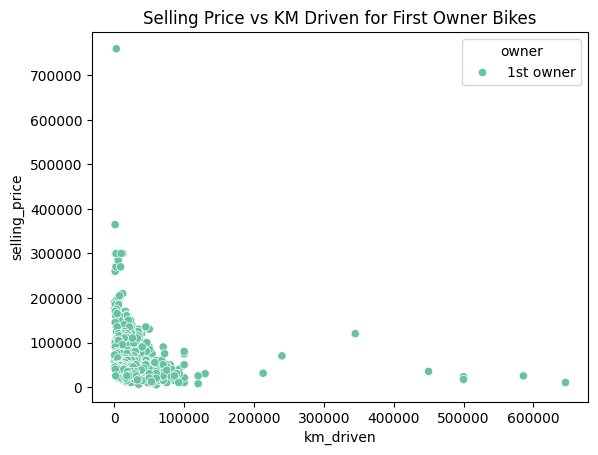

In [ ]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = bike_details[bike_details['owner'] == '1st owner']
# print(first_owner_bikes)
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes, hue='owner', palette='Set2')
plt.title("Selling Price vs KM Driven for First Owner Bikes")
plt.show
corr_value = first_owner_bikes[['selling_price', 'km_driven']].corr()
print(corr_value)
# Insights: As the KM driven increases the SP tends to decrease

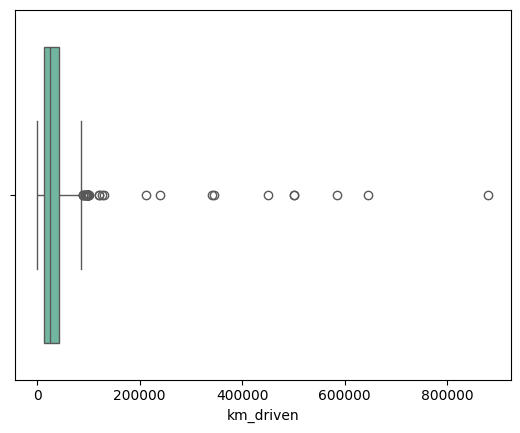

Original dataset: (1061, 7)
After removing outliers: (1022, 7)


In [ ]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.
# Identifying the outliers
sns.boxplot(x=bike_details['km_driven'], palette='Set2')
plt.show()
Q1 = bike_details['km_driven'].quantile(0.25)
Q3 = bike_details['km_driven'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# Removing the Outliers
after_outliers = bike_details[(bike_details['km_driven'] >= lower_bound) & (bike_details['km_driven'] <= upper_bound)]
print(f"Original dataset: {bike_details.shape}")
print(f"After removing outliers: {after_outliers.shape}")

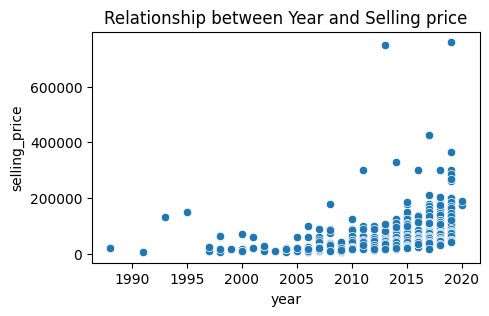

In [ ]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(5,3))
sns.scatterplot(x="year", y="selling_price", data=bike_details, palette='red')
plt.title("Relationship between Year and Selling price")
plt.show()
# Insights: Newer bikes have higher selling prices

In [ ]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
bike_details['Bike_Age'] = 2025 - bike_details['year']
avg_price_by_age = bike_details.groupby('Bike_Age')['selling_price'].mean().round(2)
print(avg_price_by_age)

Bike_Age
5     183333.33
6     119689.51
7      87660.37
8      78894.74
9      58469.02
10     56500.00
11     48668.13
12     51136.99
13     35748.40
14     35655.72
15     31793.33
16     22267.86
17     34289.29
18     24927.59
19     23380.00
20     16978.57
21     15100.00
22      8000.00
23     20666.67
24     40000.00
25     20833.33
26     15000.00
27     28333.33
28     17500.00
30    150000.00
32    130000.00
34      6000.00
37     20000.00
Name: selling_price, dtype: float64


In [ ]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
average_price = bike_details['selling_price'].mean()
above_avg = bike_details[bike_details['selling_price'] > average_price]
# print(above_avg)
bike_names = above_avg.groupby('year')['name'].apply(list)
print(bike_names)

year
1993                          [Royal Enfield Classic 350]
1995               [Royal Enfield Bullet 350 [2007-2011]]
1998                                       [Yamaha RX135]
2000                                          [Yamaha Rx]
2001               [Royal Enfield Bullet 350 [2007-2011]]
2006    [Royal Enfield Thunderbird 350, Royal Enfield ...
2007    [Royal Enfield Electra 5 S, Royal Enfield Bull...
2008    [Royal Enfield Bullet 350 [2007-2011], Royal E...
2010    [Royal Enfield Electra 5 S, Kawasaki Ninja 250...
2011    [Royal Enfield Bullet 350 [2007-2011], Honda C...
2012    [Royal Enfield Classic Desert Storm, Royal Enf...
2013    [Royal Enfield Thunderbird 350, Harley-Davidso...
2014    [Royal Enfield Bullet 350, Royal Enfield Thund...
2015    [Yamaha Fazer FI V 2.0 [2016-2018], Royal Enfi...
2016    [Royal Enfield Thunderbird 350, Honda CBR-250R...
2017    [Bajaj Dominar 400, KTM 390 Duke, Mahindra Moj...
2018    [Royal Enfield Classic Gunmetal Grey, Honda CB...
2019    [

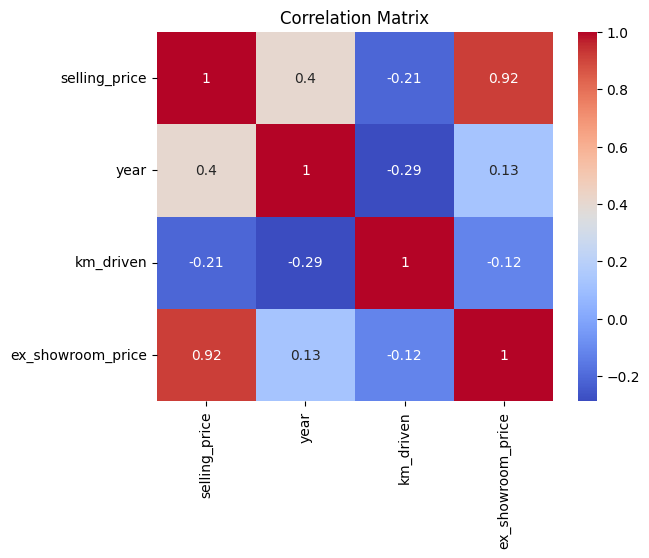

In [ ]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr_matrix = bike_details.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#**EDA - 2: Car sale Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
car_sales_data = pd.read_csv("Car_Sale.csv")
car_sales_data.shape

(23906, 16)

In [ ]:
car_sales_data.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


In [ ]:
car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_selling_price = car_sales_data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False).round(2)
print(avg_selling_price)

Dealer_Name
U-Haul CO                                          28769.92
Classic Chevy                                      28602.01
Rabun Used Car Sales                               28527.54
Iceberg Rentals                                    28522.96
Enterprise Rent A Car                              28312.58
Scrivener Performance Engineering                  28297.37
Gartner Buick Hyundai Saab                         28247.62
Saab-Belle Dodge                                   28190.14
Capitol KIA                                        28189.70
Race Car Help                                      28163.37
Chrysler of Tri-Cities                             28123.09
Star Enterprises Inc                               28113.06
Suburban Ford                                      28112.21
C & M Motors Inc                                   28111.76
Tri-State Mack Inc                                 28095.56
Pars Auto Sales                                    28013.06
Diehl Motor CO Inc          

In [ ]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_brand = car_sales_data.groupby('Company')['Price ($)'].std().round(2).sort_values(ascending=False)
print(price_variation_by_brand.head(5))
# Insights: The car brand with the highest variation in prices is Lincoln. This high standard deviation suggests that Lincoln offers a wide range of vehicles, from budget-friendly economy models to high-end or luxury variants, which creates a broad spread in prices.


Company
Lincoln     19658.05
Saab        19653.74
Cadillac    19517.12
Plymouth    19066.00
Lexus       17852.92
Name: Price ($), dtype: float64


Transmission
Auto      16500.0
Manual    17000.0
dtype: float64


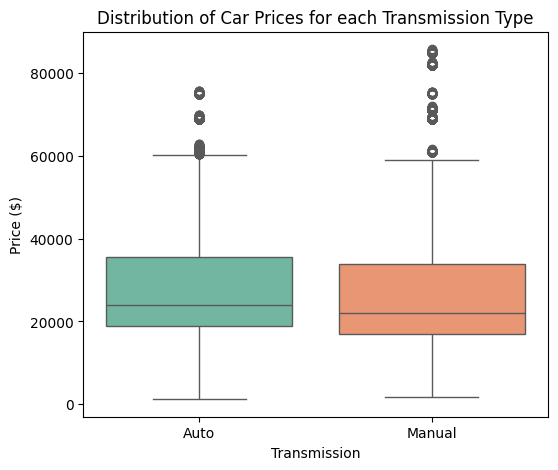

In [ ]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
IQR = car_sales_data.groupby("Transmission")["Price ($)"].describe()[['25%','50%','75%']]
IQR= IQR['75%'] - IQR['25%']
print(IQR)

plt.figure(figsize=(6,5))
sns.boxplot(x='Transmission',y='Price ($)',data=car_sales_data, palette='Set2')
plt.title("Distribution of Car Prices for each Transmission Type")
plt.show()

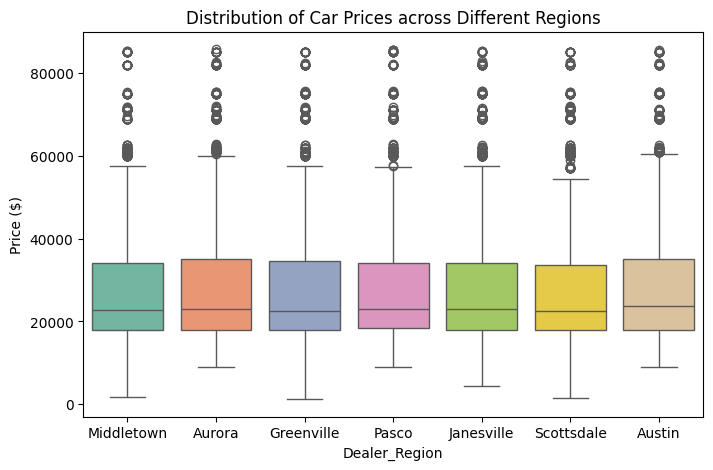

In [ ]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(8,5))
sns.boxplot(x='Dealer_Region',y='Price ($)', data=car_sales_data,palette='Set2')
plt.title('Distribution of Car Prices across Different Regions')
plt.show()

In [ ]:
# 5. What is the distribution of cars based on body styles?
body_styles = car_sales_data['Body Style'].value_counts()
print(body_styles)

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 20000000]
labels = ['<50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']
car_sales_data['Income Group'] = pd.cut(car_sales_data['Annual Income'], bins=bins, labels=labels)
avg_selling_price = car_sales_data.groupby(['Gender','Income Group'])['Price ($)'].mean().round(2).reset_index()
print(avg_selling_price)

    Gender Income Group  Price ($)
0   Female         <50K   28132.04
1   Female     50K-100K        NaN
2   Female    100K-200K   28334.00
3   Female    200K-500K   28636.57
4   Female      500K-1M   28070.24
5   Female        1M-5M   28591.10
6   Female       5M-10M   26750.12
7   Female         10M+        NaN
8     Male         <50K   27816.30
9     Male     50K-100K   43000.00
10    Male    100K-200K   21458.58
11    Male    200K-500K   28590.09
12    Male      500K-1M   27993.61
13    Male        1M-5M   28093.52
14    Male       5M-10M   30861.04
15    Male         10M+   26001.00


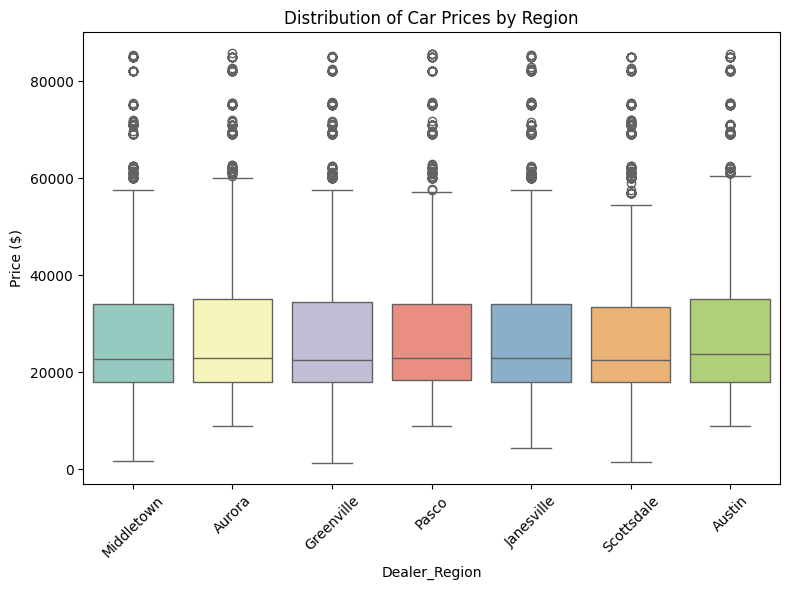

  Dealer_Region  count
0        Austin   4135
1    Janesville   3821
2    Scottsdale   3433
3         Pasco   3131
4        Aurora   3130
5    Greenville   3128
6    Middletown   3128


In [ ]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_sales_data, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
region_counts = car_sales_data['Dealer_Region'].value_counts().reset_index()
print(region_counts)

In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?
avg_price_engine = car_sales_data.groupby('Engine')['Price ($)'].mean().round(2).reset_index()
print(avg_price_engine)

                      Engine  Price ($)
0  DoubleÂ Overhead Camshaft   28248.53
1          Overhead Camshaft   27914.71


In [ ]:
# 9. How do car prices vary based on the customer’s annual income bracket?
bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, 10000000, 20000000]
labels = ['<50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '1M-5M', '5M-10M', '10M+']
car_sales_data['Income Bracket'] = pd.cut(car_sales_data['Annual Income'], bins=bins, labels=labels)
avg_price_by_income = car_sales_data.groupby('Income Bracket')['Price ($)'].mean().round(2).reset_index()
print(avg_price_by_income)

  Income Bracket  Price ($)
0           <50K   27884.30
1       50K-100K   43000.00
2      100K-200K   22833.67
3      200K-500K   28602.54
4        500K-1M   28011.73
5          1M-5M   28178.05
6         5M-10M   29947.50
7           10M+   26001.00


In [ ]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = car_sales_data['Model'].value_counts().head(5)
print(top_5_models)

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


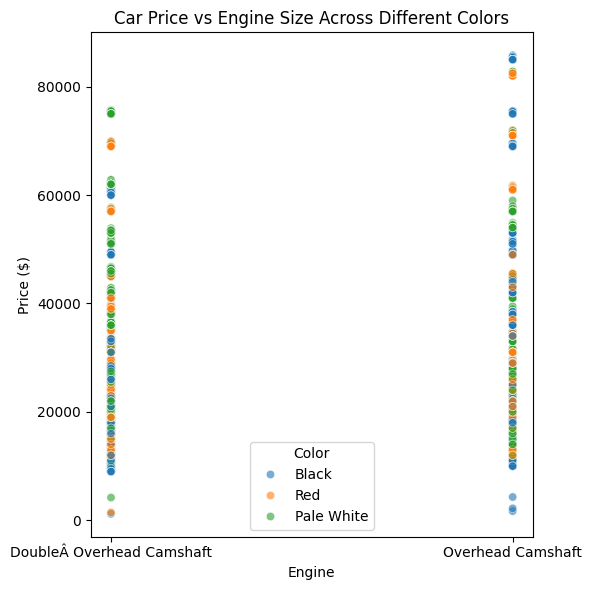

In [ ]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car_sales_data, x='Engine', y='Price ($)', hue='Color', alpha=0.6)
plt.title('Car Price vs Engine Size Across Different Colors')
plt.tight_layout()
plt.show()

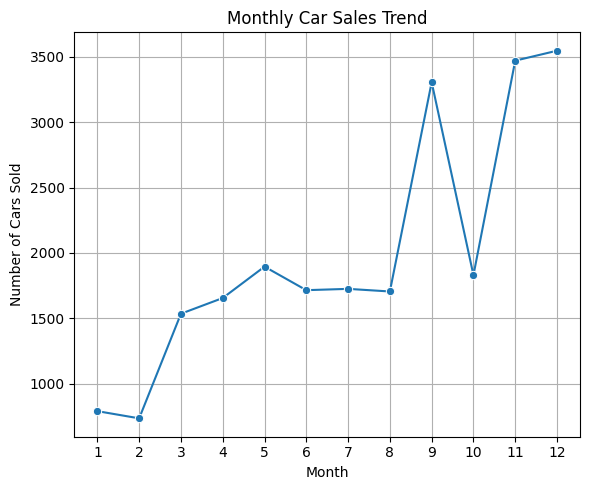

In [ ]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
car_sales_data['date_of_sale'] = pd.to_datetime(car_sales_data['Date'])
car_sales_data['sale_month'] = car_sales_data['date_of_sale'].dt.month
car_sales_data['sale_quarter'] = car_sales_data['date_of_sale'].dt.quarter
monthly_sales = car_sales_data['sale_month'].value_counts().sort_index()
plt.figure(figsize=(6, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

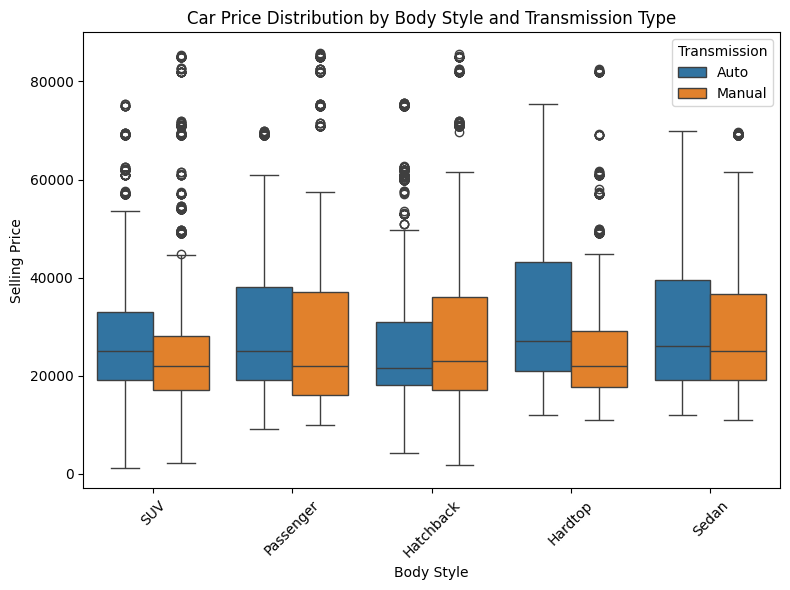

In [ ]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(8, 6))
sns.boxplot(data=car_sales_data, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Selling Price')
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

               Price ($)  Annual Income
Price ($)           1.00           0.01
Annual Income       0.01           1.00


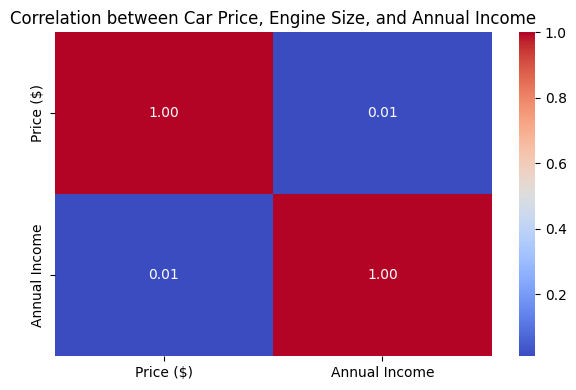

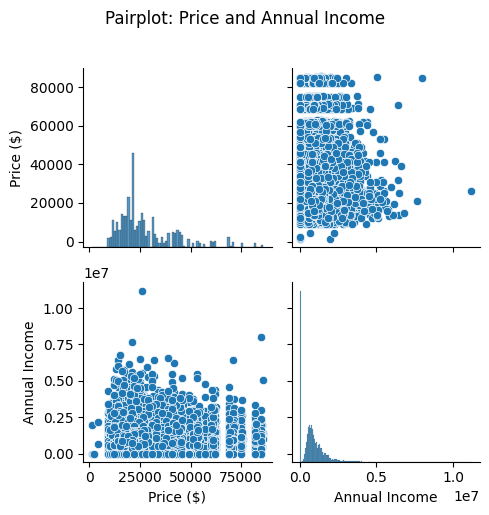

In [ ]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
corr_matrix = car_sales_data[['Price ($)', 'Annual Income']].corr().round(2)
print(corr_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Car Price, Engine Size, and Annual Income')
plt.tight_layout()
plt.show()

sns.pairplot(car_sales_data[['Price ($)', 'Annual Income']])
plt.suptitle('Pairplot: Price and Annual Income', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
# 15. How does the average car price vary across different car models and engine types?
avg_price = car_sales_data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(avg_price)

        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


#**EDA - 2: Amazon Sales Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
amazon_sales_data = pd.read_csv("amazon.csv")
amazon_sales_data.shape

(1465, 16)

In [ ]:
amazon_sales_data.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [ ]:
# 1. What is the average rating for each product category?
amazon_sales_data['rating'] = pd.to_numeric(amazon_sales_data['rating'], errors='coerce')
avg_rating_per_category = amazon_sales_data.groupby('category')['rating'].mean().reset_index()
avg_rating_per_category['rating'] = avg_rating_per_category['rating'].round(2)
print(avg_rating_per_category)

                                              category  rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...    3.80
1    Computers&Accessories|Accessories&Peripherals|...    4.15
2    Computers&Accessories|Accessories&Peripherals|...    3.50
3    Computers&Accessories|Accessories&Peripherals|...    3.60
4    Computers&Accessories|Accessories&Peripherals|...    4.05
..                                                 ...     ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.25
207  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.15
208  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.30
209  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.13
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...    4.30

[211 rows x 2 columns]


In [ ]:
# 2. What are the top rating_count products by category?
amazon_sales_data['rating_count'] = pd.to_numeric(amazon_sales_data['rating_count'], errors='coerce')
data_clean = amazon_sales_data.dropna(subset=['rating_count', 'category', 'product_name'])
top_rating_count_products = data_clean.loc[data_clean.groupby('category')['rating_count'].idxmax()]
top_rating_count_products = top_rating_count_products[['category', 'product_name', 'rating_count']]
print(top_rating_count_products.sort_values(by='rating_count', ascending=False))

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
32    Computers&Accessories|Accessories&Peripherals|...   
1272  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   
...                                                 ...   
529   Electronics|Mobiles&Accessories|MobileAccessor...   
934   Computers&Accessories|ExternalDevices&DataStor...   
210         Electronics|HomeTheater,TV&Video|Projectors   
775   Computers&Accessories|Accessories&Peripherals|...   
1222  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                           product_name  rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0  
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0  
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0  
32 

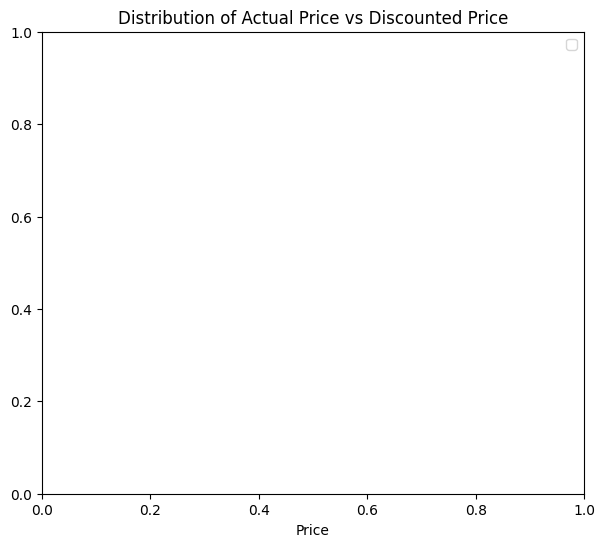

       actual_price  discounted_price
count           0.0               0.0
mean            NaN               NaN
std             NaN               NaN
min             NaN               NaN
25%             NaN               NaN
50%             NaN               NaN
75%             NaN               NaN
max             NaN               NaN


In [ ]:
# 3. What is the distribution of discounted prices vs. actual prices?
amazon_sales_data['discounted_price'] = pd.to_numeric(amazon_sales_data['discounted_price'], errors='coerce')
amazon_sales_data['actual_price'] = pd.to_numeric(amazon_sales_data['actual_price'], errors='coerce')
data_clean = amazon_sales_data.dropna(subset=['discounted_price', 'actual_price'])
# Plot histograms side by side
plt.figure(figsize=(7,6))
sns.histplot(data_clean['actual_price'], color='blue', label='Actual Price', bins=50, alpha=0.6)
sns.histplot(data_clean['discounted_price'], color='orange', label='Discounted Price', bins=50, alpha=0.6)
plt.title('Distribution of Actual Price vs Discounted Price')
plt.xlabel('Price')
plt.legend()
plt.show()
# Summary stats
print(data_clean[['actual_price', 'discounted_price']].describe().round(2))

In [ ]:
# 4. How does the average discount percentage vary across categories?
amazon_sales_data['discount_percentage'] = amazon_sales_data['discount_percentage'].astype(str)
amazon_sales_data['discount_percentage'] = amazon_sales_data['discount_percentage'].str.replace('%', '', regex=False)
amazon_sales_data['discount_percentage'] = pd.to_numeric(amazon_sales_data['discount_percentage'], errors='coerce')
avg_discount_by_category = amazon_sales_data.groupby('category')['discount_percentage'].mean().reset_index()
avg_discount_by_category['discount_percentage'] = avg_discount_by_category['discount_percentage'].round(2)
print(avg_discount_by_category)

                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [ ]:
# 5. What are the most popular product names?
popular_products = amazon_sales_data['product_name'].value_counts().reset_index()
popular_products.columns = ['product_name', 'count']
print(popular_products.head(10))

                                        product_name  count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2  Amazonbasics Nylon Braided Usb-C To Lightning ...      3
3  Duracell USB Lightning Apple Certified (Mfi) B...      3
4        Flix Micro Usb Cable For Smartphone (Black)      3
5  Fire-Boltt India's No 1 Smartwatch Brand Talk ...      3
6  Wayona Nylon Braided USB to Lightning Fast Cha...      3
7  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...      3
8  Sounce Fast Phone Charging Cable & Data Sync U...      3
9  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...      3


In [ ]:
# 6. What are the most popular product keywords?
from collections import Counter
product_names = amazon_sales_data['product_name'].dropna()
# Combine all product names into a single string and split into words
all_words = ' '.join(product_names).lower().split()
# Removing very common stopwords (like "and", "with", "for", etc.)
common_words = {'with', 'and', 'for', 'the', 'in', 'of', 'a', '-', '&'}
filtered_words = [word.strip(".,:-_()[]") for word in all_words if word.lower() not in common_words]
word_counts = Counter(filtered_words)
keywords_df = pd.DataFrame(word_counts.items(), columns=['keyword', 'count'])
keywords_df = keywords_df.sort_values(by='count', ascending=False).reset_index(drop=True)
print(keywords_df.head(20))

       keyword  count
0        black    468
1            |    457
2        cable    401
3          usb    389
4     charging    246
5           to    218
6         fast    211
7            c    188
8        smart    172
9        white    155
10        type    148
11          tv    146
12  compatible    142
13        data    135
14           1    134
15          hd    130
16         led    118
17    wireless    118
18           3    117
19       water    109


In [ ]:
# 7. What are the most popular product reviews?
popular_reviews = amazon_sales_data['product_name'].value_counts().reset_index()
popular_reviews.columns = ['product_name', 'review_count']
print(popular_reviews.head(10))

                                        product_name  review_count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...             5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...             4
2  Amazonbasics Nylon Braided Usb-C To Lightning ...             3
3  Duracell USB Lightning Apple Certified (Mfi) B...             3
4        Flix Micro Usb Cable For Smartphone (Black)             3
5  Fire-Boltt India's No 1 Smartwatch Brand Talk ...             3
6  Wayona Nylon Braided USB to Lightning Fast Cha...             3
7  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             3
8  Sounce Fast Phone Charging Cable & Data Sync U...             3
9  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             3


In [ ]:
# 8. What is the correlation between discounted_price and rating?
amazon_sales_data['discounted_price'] = pd.to_numeric(amazon_sales_data['discounted_price'], errors='coerce')
amazon_sales_data['rating'] = pd.to_numeric(amazon_sales_data['rating'], errors='coerce')
filtered_data = amazon_sales_data.dropna(subset=['discounted_price', 'rating'])
correlation = filtered_data['discounted_price'].corr(filtered_data['rating'])
print(f"Correlation between discounted_price and rating: {correlation:.2f}")

Correlation between discounted_price and rating: nan


In [ ]:
# 9. What are the Top 5 categories based on the highest ratings?
amazon_sales_data['rating'] = pd.to_numeric(amazon_sales_data['rating'], errors='coerce')
rating_data = amazon_sales_data.dropna(subset=['category', 'rating'])
avg_rating_by_category = (
    rating_data.groupby('category')['rating']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='rating', ascending=False)
)
top_5_categories = avg_rating_by_category.head(5)
print(top_5_categories)

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.

# 1. Low-rated Products with High Discounts
# - Re-evaluate product quality; discounts aren't improving satisfaction.
# 2. Poorly Rated Categories
# - Identify and improve or replace low-performing items.
# 3. Highly Reviewed but Poorly Rated Products
# - Address negative feedback; may hurt brand image.
# 4. High-rated Products with Low Visibility
# - Promote these more via ads or bundling.
# 5. Keyword Optimization
# - Use trending keywords in titles/descriptions to boost discoverability.
# 6. Unbalanced Pricing in Categories
# - Review pricing strategy for consistency.
# 7. Suspicious Rating Patterns
# - Monitor for review manipulation or bias.
# 8. Few Reviews on Many Products
# - Encourage more reviews to build trust.

# **EDA - 4: Spotify Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
spotify_data = pd.read_csv("spotify.csv")
spotify_data.shape

(440, 5)

In [ ]:
spotify_data.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [ ]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
print("Initial shape:", spotify_data.shape)
print("\nMissing values:\n", spotify_data.isnull().sum())
spotify_data_cleaned = spotify_data.dropna()
duplicates = spotify_data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
spotify_data_cleaned = spotify_data_cleaned.drop_duplicates()
print("\nFinal cleaned shape:", spotify_data_cleaned.shape)

Initial shape: (440, 5)

Missing values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Final cleaned shape: (413, 5)


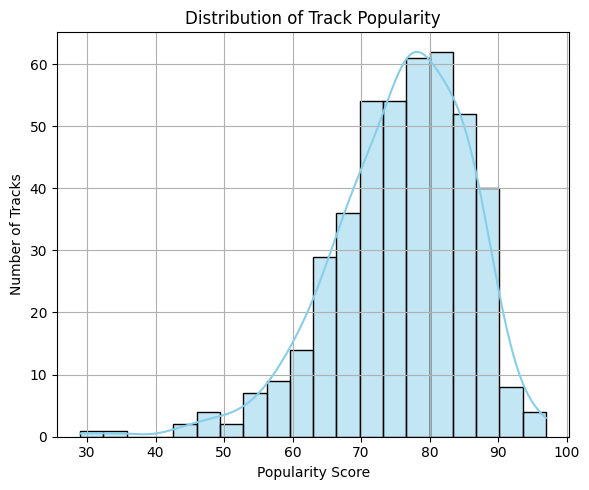

In [ ]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Popularity'])
plt.figure(figsize=(6, 5))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()
plt.show()

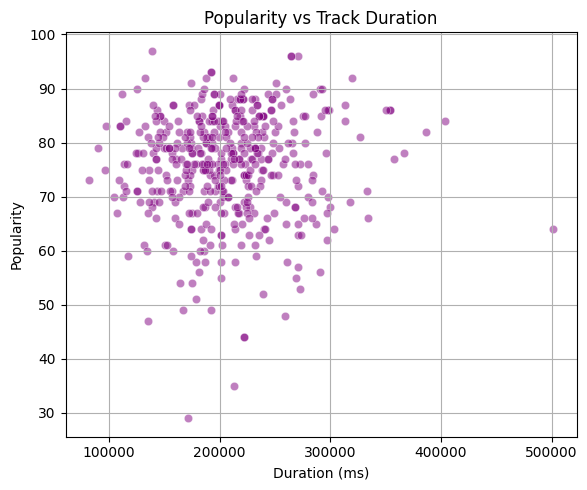

In [ ]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data['Duration (ms)'] = pd.to_numeric(spotify_data['Duration (ms)'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Popularity', 'Duration (ms)'])
plt.figure(figsize=(6, 5))
sns.scatterplot(data=spotify_data, x='Duration (ms)', y='Popularity', alpha=0.5, color='purple')
plt.title('Popularity vs Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

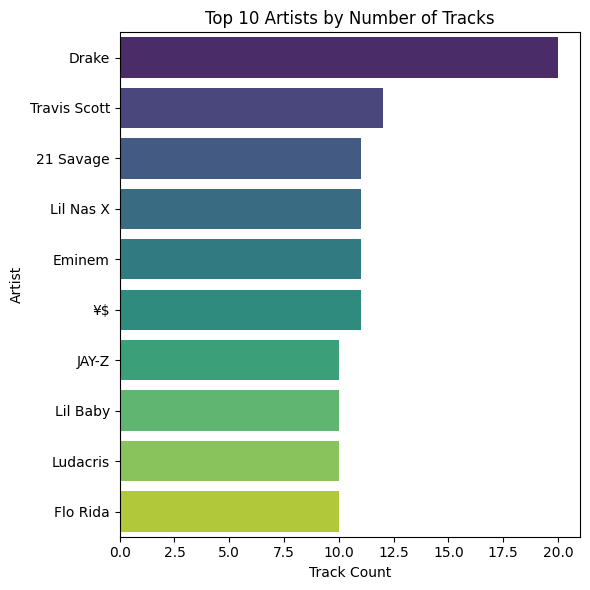

In [ ]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
top_artists = spotify_data['Artist'].value_counts().head(10)
plt.figure(figsize=(6, 6))
sns.countplot(data=spotify_data[spotify_data['Artist'].isin(top_artists.index)],
              y='Artist',
              order=top_artists.index,
              palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [ ]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Popularity'])
least_popular_tracks = spotify_data.sort_values(by='Popularity').head(5)
result = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
print(result)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [ ]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Popularity'])
top_artists = spotify_data['Artist'].value_counts().head(5).index
top_artists_data = spotify_data[spotify_data['Artist'].isin(top_artists)]
avg_popularity = top_artists_data.groupby('Artist')['Popularity'].mean().round(2).sort_values(ascending=False)
print("Average Popularity of Top 5 Artists by Track Count:\n")
print(avg_popularity)
highest_avg_artist = avg_popularity.idxmax()
highest_avg_value = avg_popularity.max()
print(f"\nArtist with highest average popularity among top 5: {highest_avg_artist} ({highest_avg_value})")


Average Popularity of Top 5 Artists by Track Count:

Artist
Travis Scott    87.00
21 Savage       84.18
Eminem          83.64
Drake           83.50
Lil Nas X       76.09
Name: Popularity, dtype: float64

Artist with highest average popularity among top 5: Travis Scott (87.0)


In [ ]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Popularity'])
top_artists = spotify_data['Artist'].value_counts().head(5).index
top_artists_data = spotify_data[spotify_data['Artist'].isin(top_artists)]
most_popular_tracks = top_artists_data.loc[top_artists_data.groupby('Artist')['Popularity'].idxmax(), ['Artist', 'Track Name', 'Popularity']]
print(most_popular_tracks)

           Artist                               Track Name  Popularity
70      21 Savage                                   redrum          96
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80         Eminem                               Without Me          90
312     Lil Nas X                        THATS WHAT I WANT          81
30   Travis Scott               FE!N (feat. Playboi Carti)          93


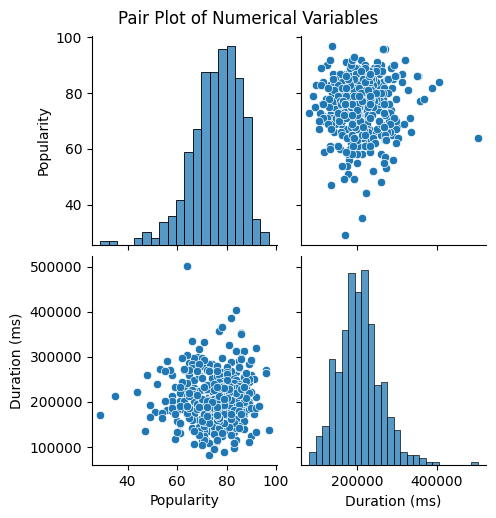

In [ ]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data['Duration (ms)'] = pd.to_numeric(spotify_data['Duration (ms)'], errors='coerce')
num_vars = ['Popularity', 'Duration (ms)']
df_num = spotify_data[num_vars].dropna()
sns.pairplot(df_num)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

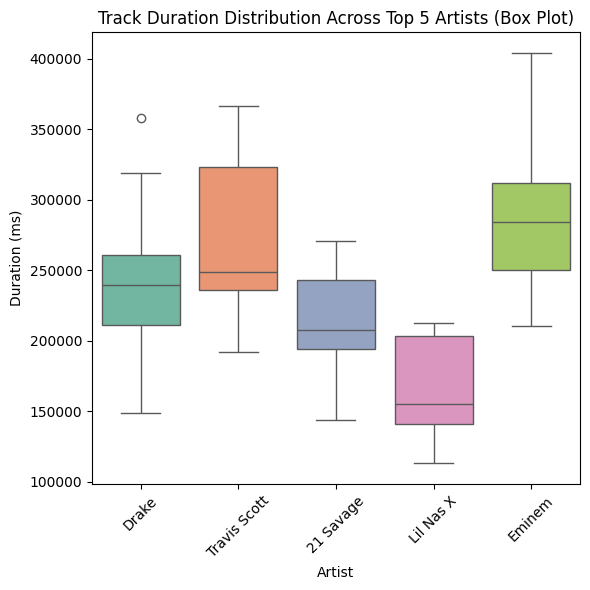

In [ ]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
spotify_data['Duration (ms)'] = pd.to_numeric(spotify_data['Duration (ms)'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Duration (ms)'])
top_artists = spotify_data['Artist'].value_counts().head(5).index
top_artists_data = spotify_data[spotify_data['Artist'].isin(top_artists)]
plt.figure(figsize=(6, 6))
sns.boxplot(data=top_artists_data, x='Artist', y='Duration (ms)', palette='Set2')
plt.title('Track Duration Distribution Across Top 5 Artists (Box Plot)')
plt.ylabel('Duration (ms)')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

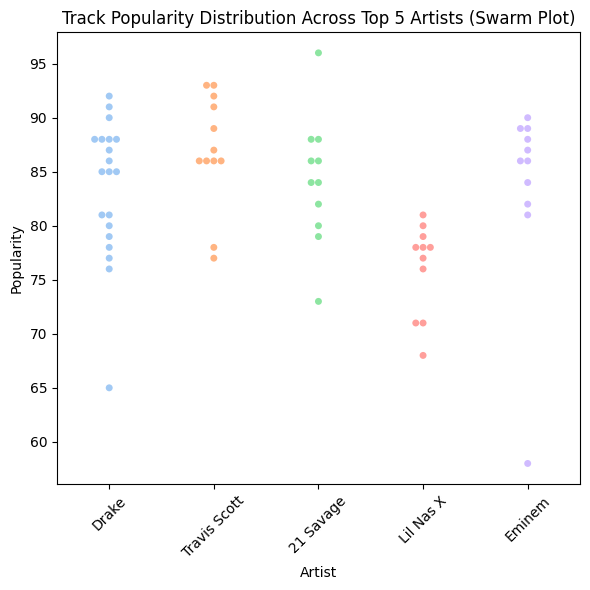

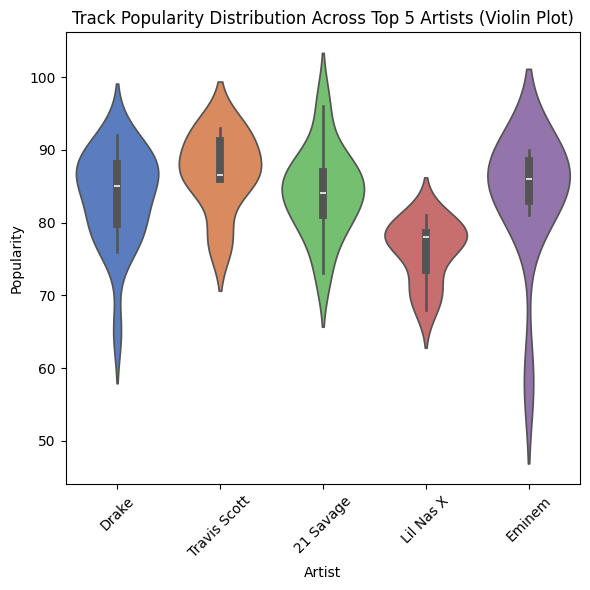

In [ ]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
spotify_data['Popularity'] = pd.to_numeric(spotify_data['Popularity'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['Popularity'])
top_artists = spotify_data['Artist'].value_counts().head(5).index
top_artists_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

plt.figure(figsize=(6, 6))
sns.swarmplot(data=top_artists_data, x='Artist', y='Popularity', palette='pastel')
plt.title('Track Popularity Distribution Across Top 5 Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.violinplot(data=top_artists_data, x='Artist', y='Popularity', palette='muted')
plt.title('Track Popularity Distribution Across Top 5 Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()